In [1]:
from data_preparation import DataPreparator
from apply_clustering import ClusteringApplier

In [2]:
import pandas as pd
import numpy as np

In [3]:
#import config_nature as config
import config

In [3]:
minmax = config.FINGERPRINT_SCALING
input_path = f"{config.OUTPUT_FOLDER_BASE}observables/"
df_explainable: pd.DataFrame = ClusteringApplier.read_explaining_features()
df_fingerprint = pd.read_excel(
    f"{input_path}{config.DATASET_NAME}-fingerprint-observables-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx",
    index_col=0
)
input_file: str = (
    f"{config.OUTPUT_FOLDER_BASE}explaining_features/{config.DATASET_NAME}-optimal_explainable_features-{config.DISTANCE_MEASURE_FINGERPRINT}-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx"
)
optimal_df = pd.read_excel(input_file, index_col=0)
optimal_features = list(optimal_df.T[optimal_df.T > 0].dropna().T.columns)

NameError: name 'config' is not defined

In [18]:
#selected = ['A.nas_01', 'H.nig_03']
#selected = ['K.ell_01', 'T.ory_18']

selected = ['Brazil', 'China', 'France']
selected = ['Japan', 'Saudi Arabia', 'Sweden']

In [19]:
df_fingerprint.loc[selected]

,0,1,2,3,4,5,6,7
Country,,,,,,,,
Japan,0.169492,0.372881,0.084746,0.000000,0.033898,0.000000,0.152542,0.186441
Saudi Arabia,0.125000,0.158333,0.083333,0.083333,0.083333,0.191667,0.233333,0.041667
Sweden,0.163265,0.326531,0.000000,0.040816,0.163265,0.040816,0.244898,0.020408


In [20]:
ClusteringApplier.visualize_fingerprints(
    df_fingerprint=df_fingerprint,
    df_explainable=df_explainable,
    optimal_features=optimal_features,
    use_config=True,
    index=selected
)

In [7]:
output_path = f"{config.OUTPUT_FOLDER_BASE}observables/"
pw_norm_dist = pd.read_excel(
    f"{output_path}{config.DATASET_NAME}-distance-normalized-matrix-{config.DISTANCE_MEASURE_FINGERPRINT}-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx",
    index_col=0
)

In [8]:
dendrogram = ClusteringApplier._plot_dendrogram_by_distance_matrix(
    pw_norm_dist.to_numpy(),
    labels=pw_norm_dist.columns,
    use_config=True,
    x_label=config.GROUP_NAME,
    y_label="Distance of fingerprints",
    title="",
    figsize=(10, 3)
)

In [9]:
exp_file: str = (
    f"{config.OUTPUT_FOLDER_BASE}explaining_features/{config.DATASET_NAME}-pairwise_explainable_distances-{config_zoo.DISTANCE_MEASURE_FINGERPRINT}-{config_zoo.NUMBER_OBSERVABLE_PATTERNS}.xlsx"
)
df_explainable_distances = pd.read_excel(exp_file, index_col=0)

In [10]:
ClusteringApplier._plot_dendrogram_by_distance_matrix(
    mat=df_explainable_distances.to_numpy(),
    labels=list(df_explainable_distances.index),
    use_config=True,
    x_label=config.GROUP_NAME,
    y_label="Distance based on explainable features",
    title="Similarity based on the optimal set of explainable features",
    figsize=(10, 3)
)

In [11]:
# Run this to make sure the "normal way" still works
VALIDATE_THE_OTHER_WAY = False

if VALIDATE_THE_OTHER_WAY:
    DataPreparator.prepare_data()
    optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot()
    ClusteringApplier.calculate_observable_patterns(_n_clusters=optimal_number_of_clusters)
    ClusteringApplier.calculate_explainable_distances()

In [12]:
df_observable = pd.read_excel(config.INPUT_FILE_OBSERVABLE_FEATURES) #'../data/biological_set_raw_data.xlsx')
df_explainable = pd.read_excel(config.INPUT_FILE_EXPLAINING_FEATURES)#'../data/biological_set_explaining_features.xlsx')

In [13]:
#df_observable.Country = df_observable.Country.transform(lambda x: x.strip())

In [14]:
#observed_features = ['perc_lying', 'perc_lhd', 'num_lying', 'num_lhd']
#explaining_features = ['Age', 'Sex', 'Zoo', 'Stable', 'Genus_ID', 'Family_ID','Order_ID', 'SH', 'Weight', 'Habitat']
#index_name = 'Individual'

observed_features = list(config.OBSERVABLE_FEATURE_NAMES.keys())
explaining_features = list(config.EXPLAINING_FEATURE_NAMES.keys())
index_name = config.GROUP_NAME

In [15]:
preparation_result = DataPreparator.prepare_data(
    use_config=False,
    df_observable=df_observable,
    df_explainable=df_explainable,
    distortion_mean=0.,
    distortion_std=0.001,
    observed_features=observed_features,
    explaining_features=explaining_features,
    nn_imputation_k=10,
    group_name=index_name
)

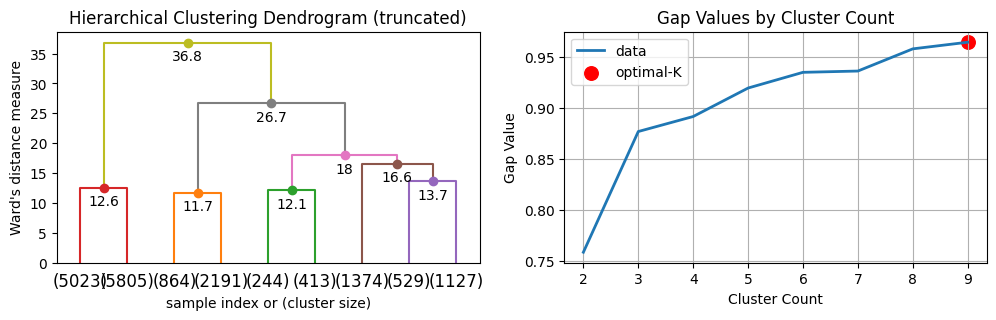

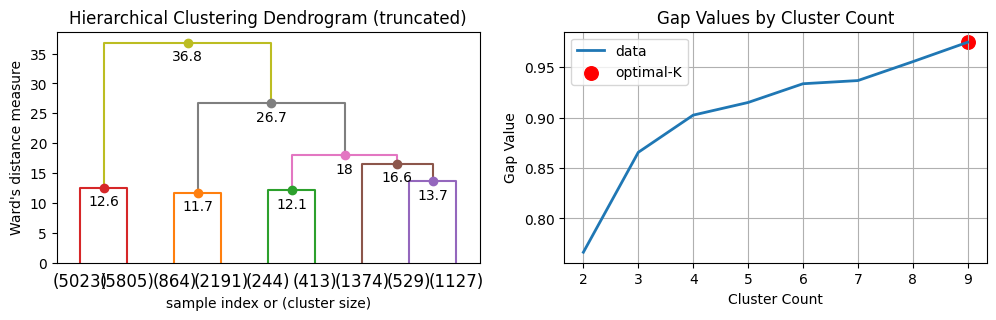

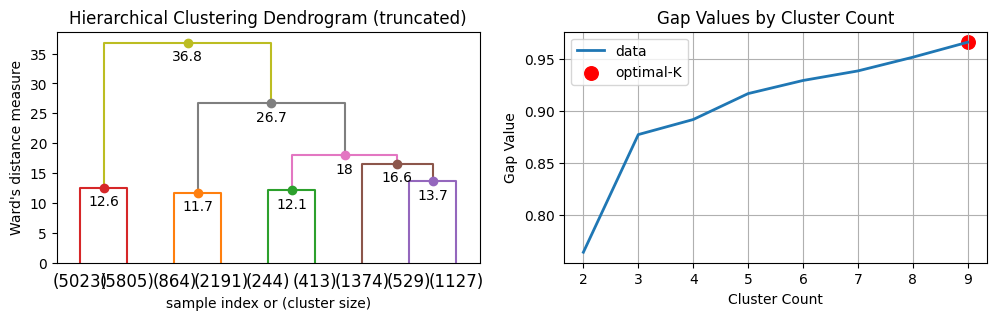

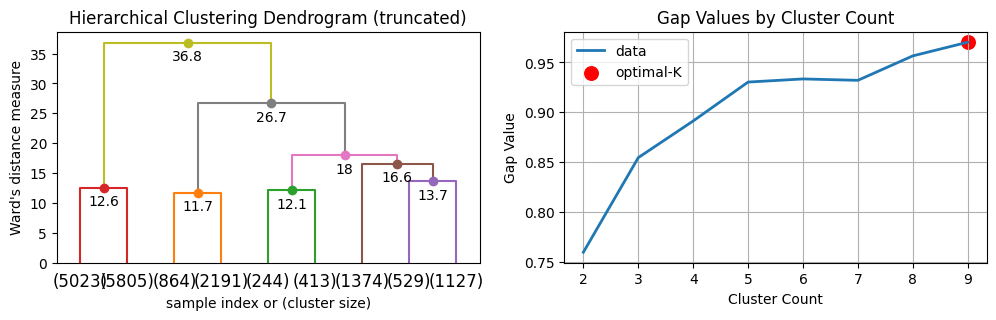

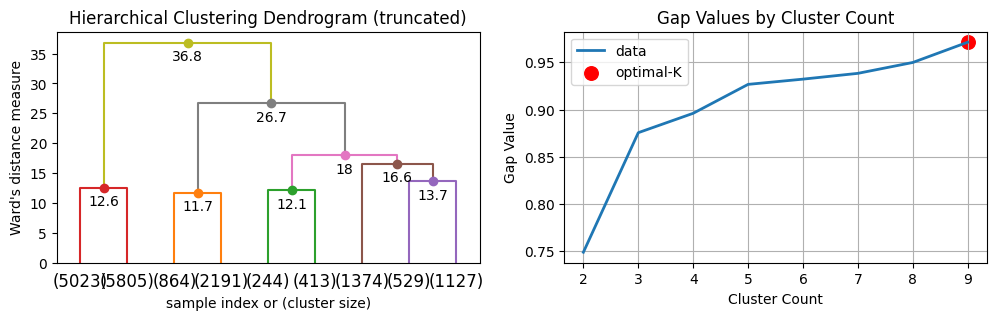

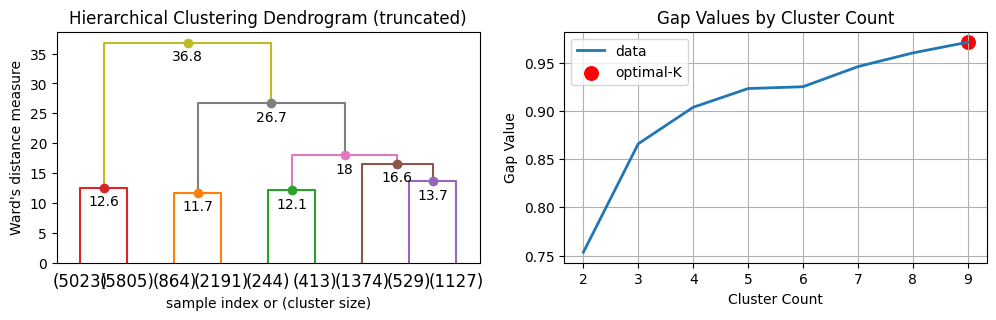

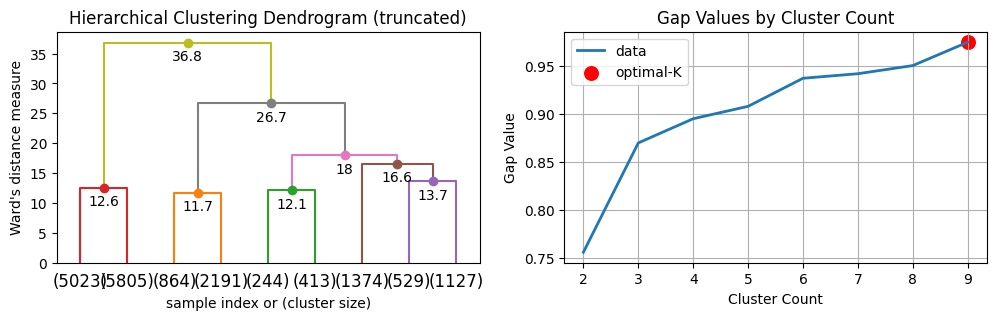

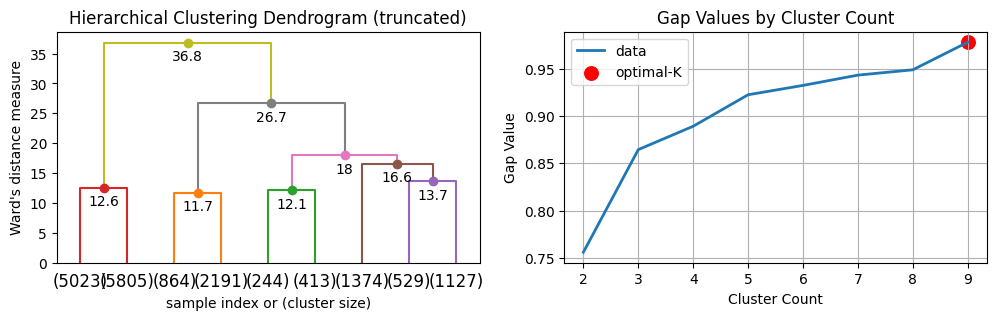

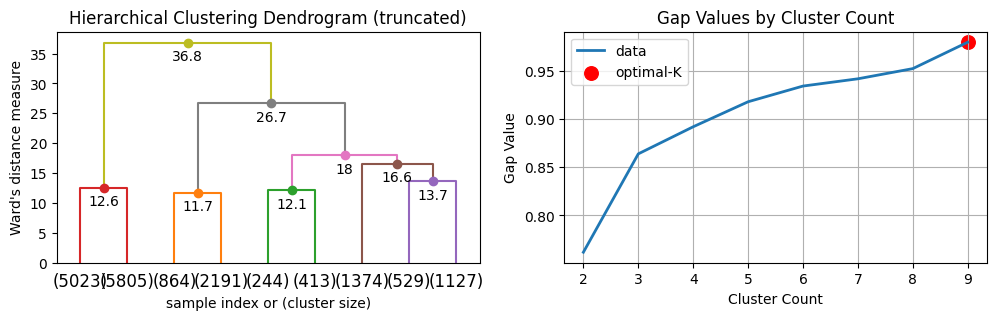

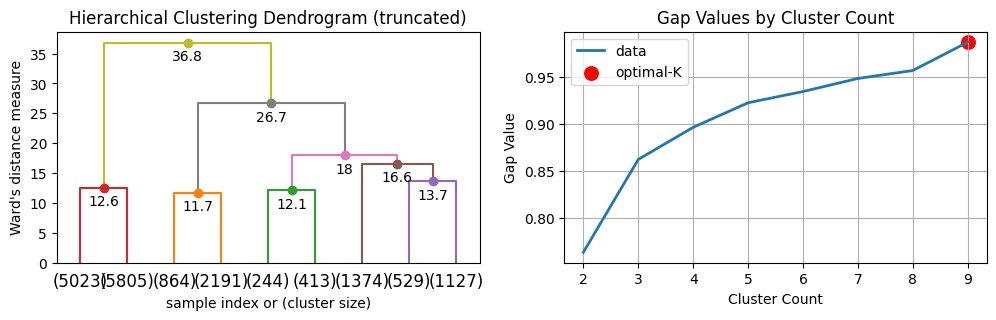

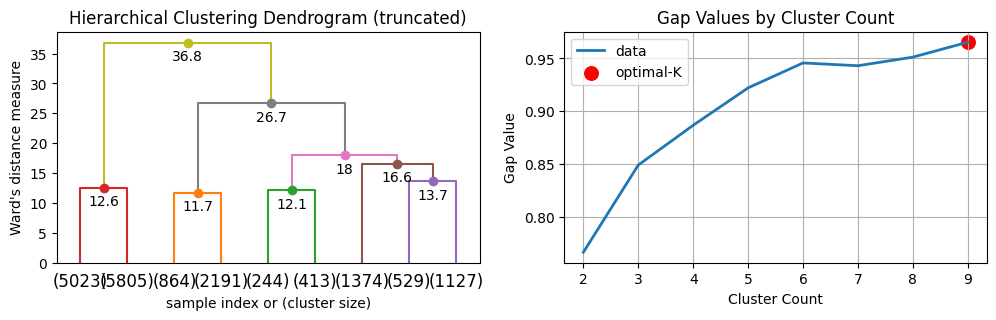

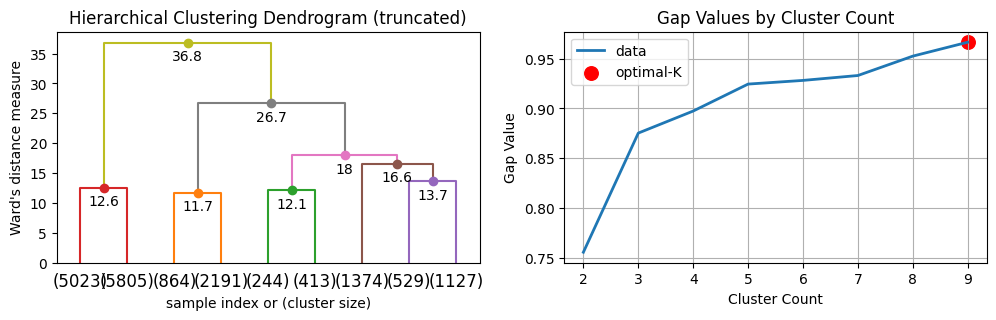

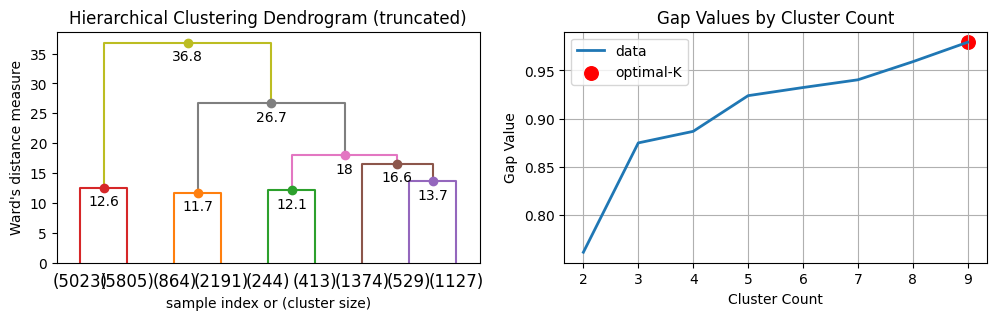

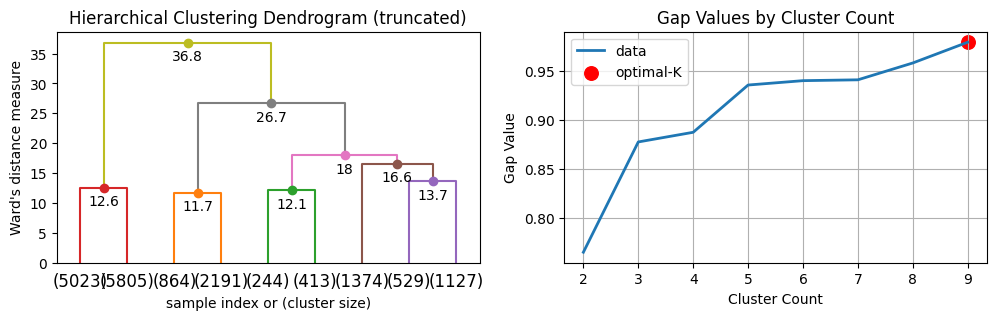

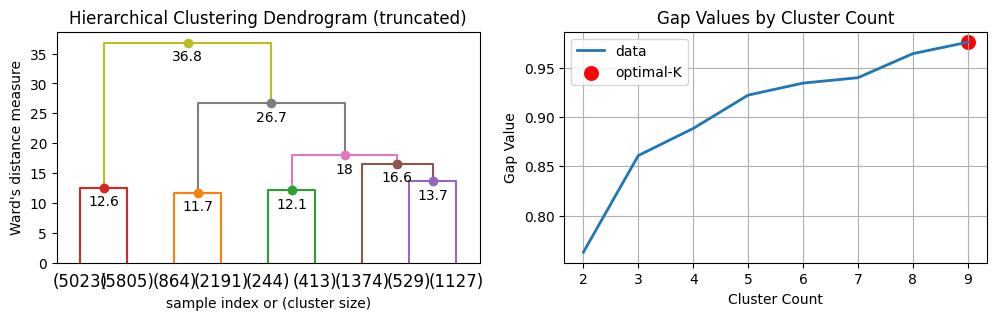

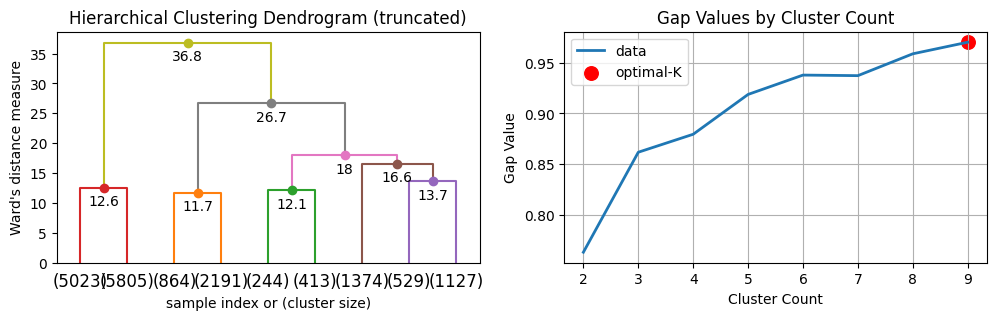

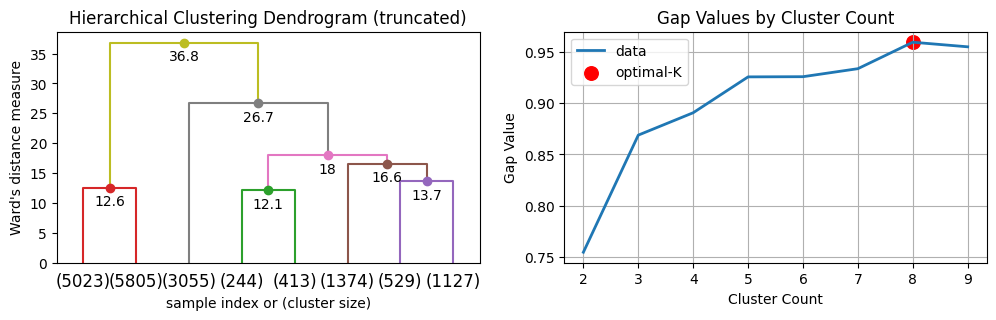

In [19]:
while True:
    optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot(
        use_config=True,
        df_observable=preparation_result['observable_df'],
        observed_features=observed_features,
        gap_statistic_cluster_range=11,
        plot=True,
        plot_size=(12, 3)
    )
    if optimal_number_of_clusters['n_clusters'] == 8:
        break


In [20]:
optimal_number_of_clusters

{'n_clusters': 8,
 'knee': np.int64(5),
 'elbow': np.int64(2),
 'clusterer': OptimalK(n_jobs=16, parallel_backend="joblib"),
 'figure': <Figure size 1200x300 with 2 Axes>}

In [21]:
...

Ellipsis

In [22]:
config_zoo.OBSERVABLE_PATTERN_NAME_PLURAL

'response types'

In [23]:
observed_features

['Env_Pol_1', 'Climate_1', 'Aliens_1', 'Landuse_1', 'Exploit_1']

In [1]:
observable_patterns_result = ClusteringApplier.calculate_observable_patterns(
    use_config=True,
    df_observable_data=preparation_result['observable_df'],
    _n_clusters=optimal_number_of_clusters['n_clusters'],
    observable_name='observable_name',
    observable_feature_names=observed_features,
    plot_title='Response types',
    number_observable_patterns='auto',
    distance_measure_fingerprint='jensenshannon',
    group_name=index_name, 
    plot=True,
    max_fingerprints_per_col=3,
    spacing={
        'horizontal_spacing': 0.1,
        'vertical_spacing': 0.05,
        'height': 500,
        'width': 1500
    }
)

NameError: name 'ClusteringApplier' is not defined

In [36]:
pd.DataFrame([1 for val in observable_patterns_result['hom_df']], index=observable_patterns_result['hom_df'].columns).T

Individual,A.nas_01,A.nas_02,A.nas_03,A.nas_05,A.nas_06,A.nas_07,A.nas_08,C.tau_01,C.tau_02,C.tau_03,...,T.ory_20,T.ory_21,T.ory_22,T.ory_24,T.ory_25,T.spe_01,T.str_01,T.str_02,T.str_03,T.str_04
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


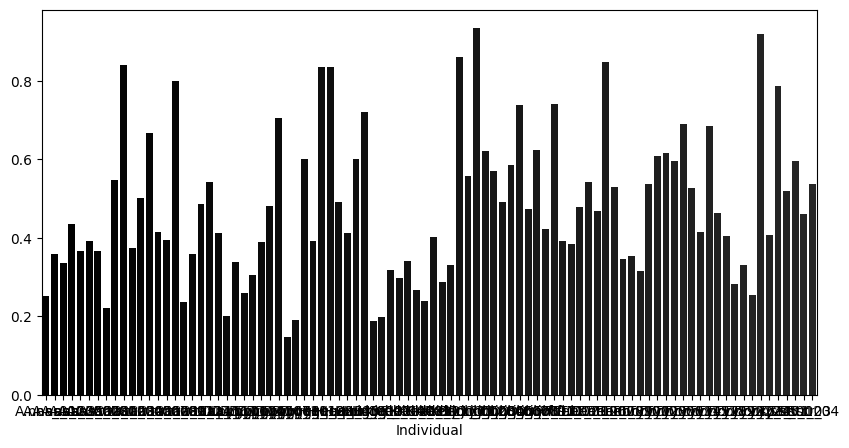

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

dark_black_palette = sns.dark_palette("#000000", n_colors=observable_patterns_result['hom_df'].shape[1], reverse=True)
# Apply the custom palette

fig = plt.figure(figsize=(10, 5))
ax = sns.barplot(observable_patterns_result['hom_df'], palette=dark_black_palette)

In [28]:
observable_patterns_result['spider_plots']

  0%|          | 0/65535 [00:00<?, ?it/s]

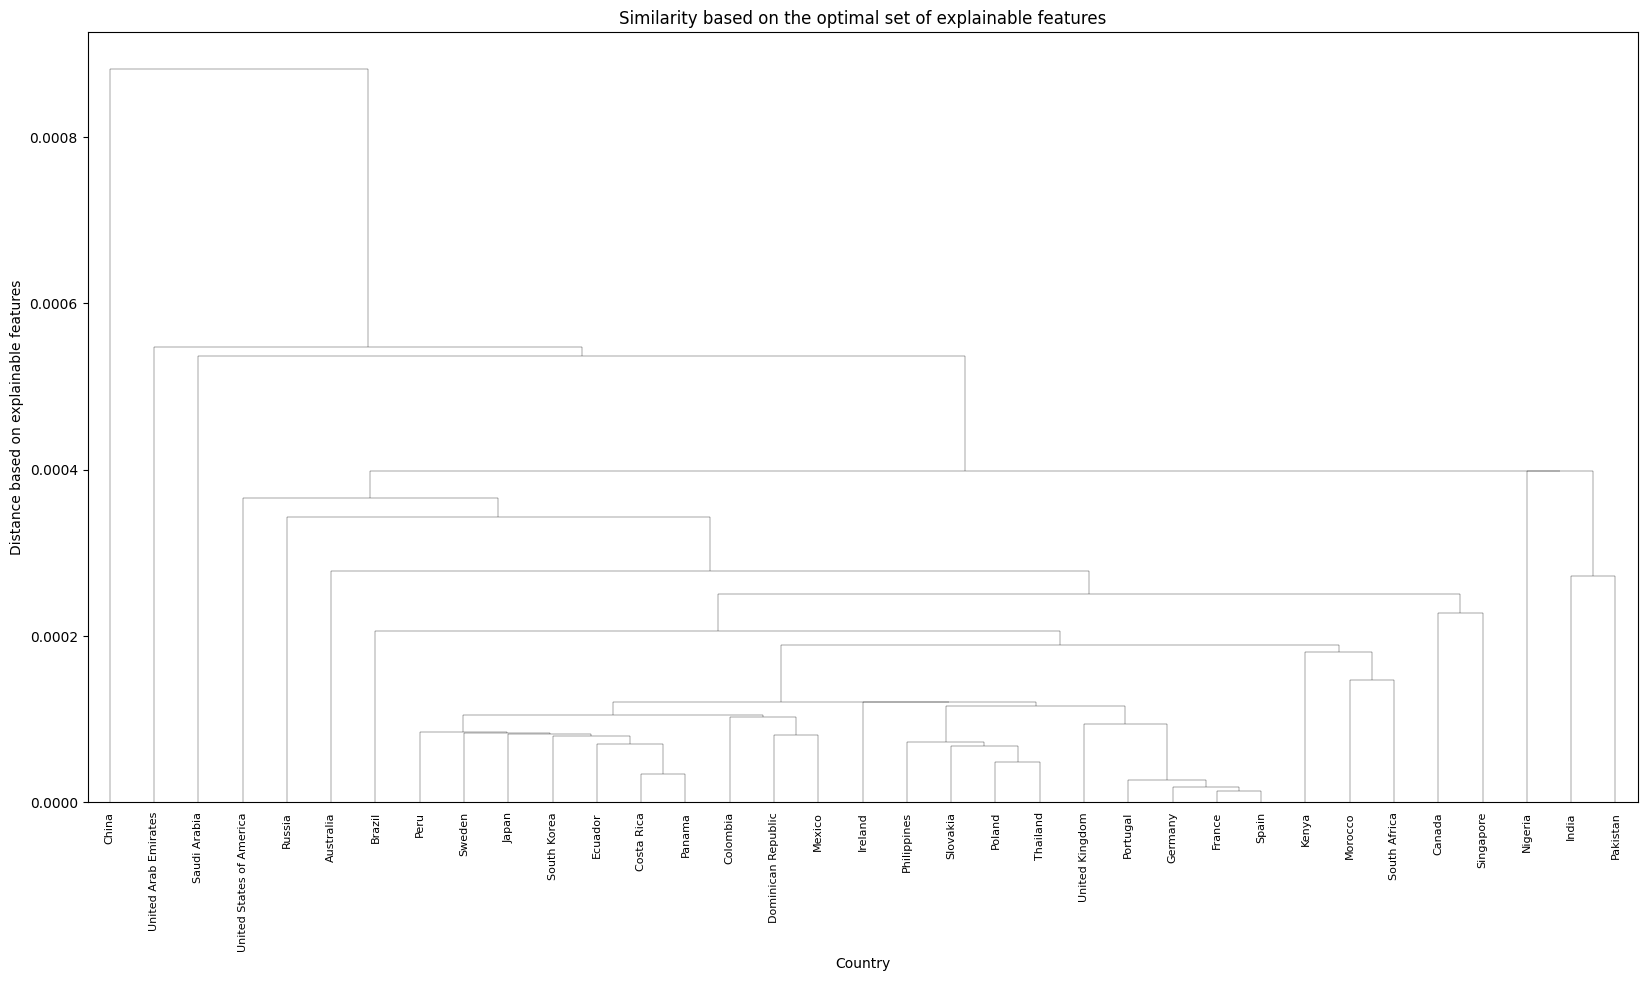

In [18]:
calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
    use_config=False,
    df_explainable=preparation_result['explainable_df'].copy(),
    df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
    explaining_features=explaining_features,
    method='exact',
    distance_measure='correlation',
    sparsity_parameter=0.00,
    max_num_threads=12,
    group_name=index_name,
    plot=True,
)

In [23]:
ClusteringApplier.visualize_fingerprints()

In [19]:
calculate_explainable_distances_result.keys()

dict_keys(['overview_df', 'df_explainable_distances', 'dendrogram', 'optimal_feature_set', 'optimal_feature_importances'])

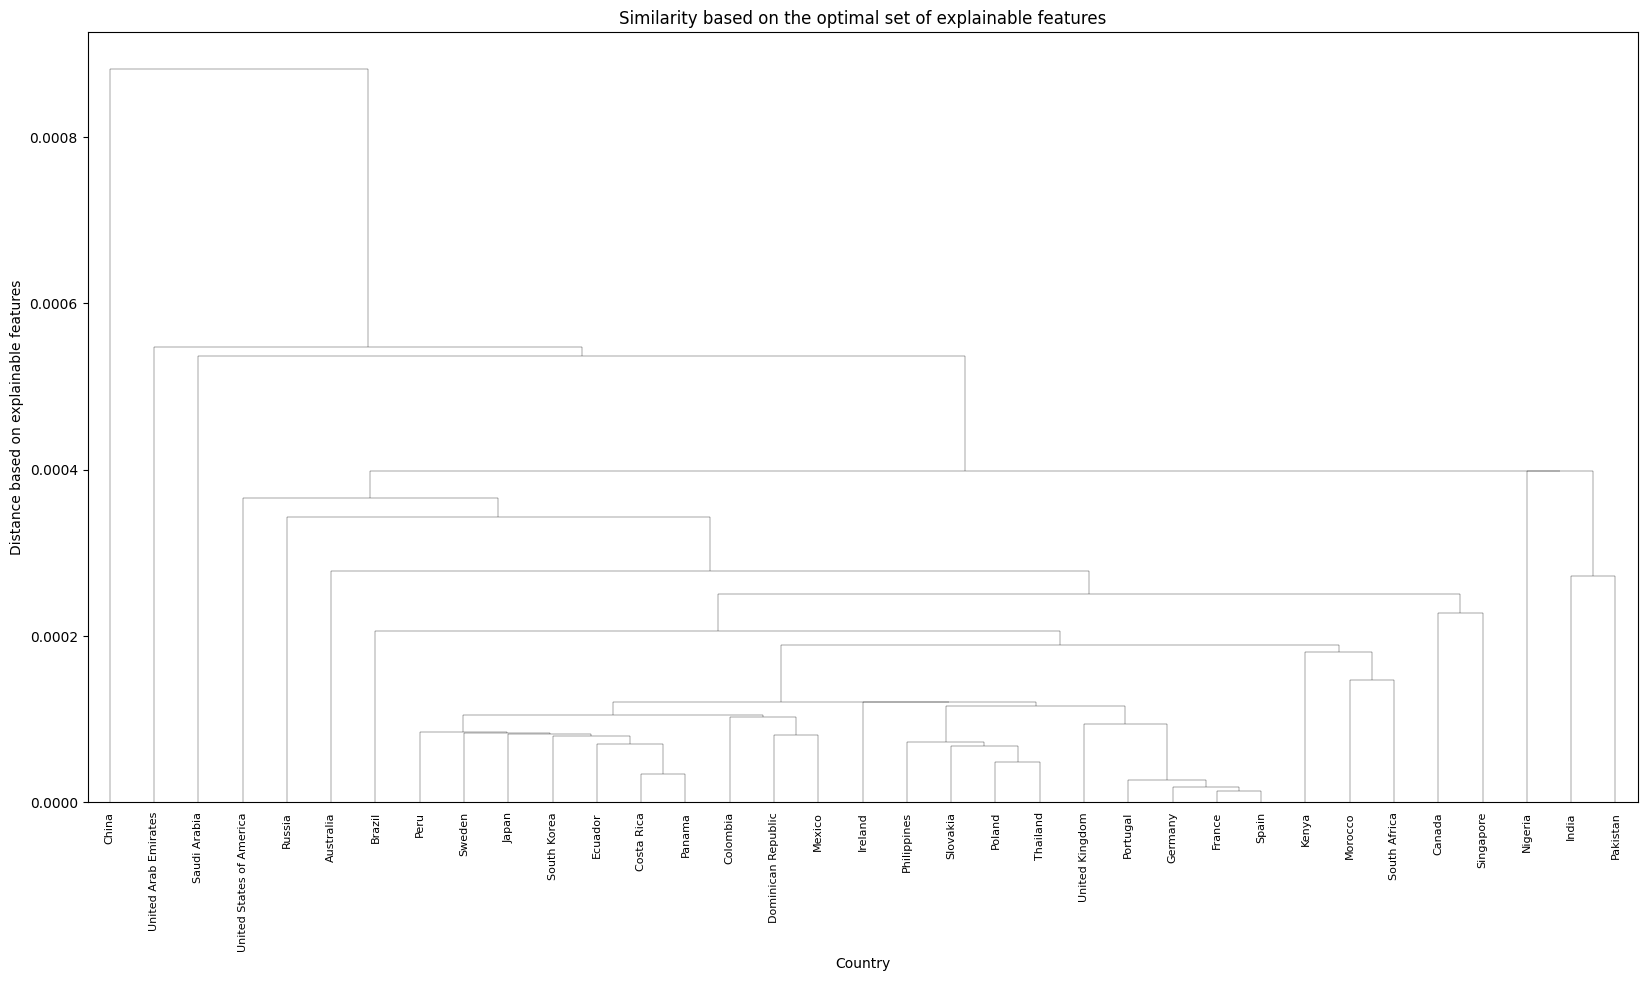

In [20]:
calculate_explainable_distances_result['dendrogram']

In [17]:
heuristic_calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
    use_config=False,
    df_explainable=preparation_result['explainable_df'].copy(),
    df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
    explaining_features=explaining_features.copy(),
    method='heuristic',
    distance_measure='correlation',
    sparsity_parameter=0.00,
    max_num_threads=12,
    group_name=index_name,
    heuristics_N=2,
    plot=True
)
heuristic_calculate_explainable_distances_result['optimal_feature_set']

  0%|          | 0/136 [00:00<?, ?it/s]

Started with ['HDI', 'LPI']
Refuted 'GI'


['HDI', 'LPI']

In [14]:
calculate_explainable_distances_result['overview_df']

NameError: name 'calculate_explainable_distances_result' is not defined

In [113]:
ClusteringApplier.visualize_fingerprints()
ClusteringApplier.visualize_regression()

In [4]:
from visualize_result import ResultVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import config
import pandas as pd

In [10]:
f: str = (
    f"{config.OUTPUT_FOLDER_BASE}explaining_features/{config.DATASET_NAME}-optimal_explainable_feature_importances-{config.DISTANCE_MEASURE_FINGERPRINT}-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx"
)
f

'../results/zoo_1/explaining_features/biological-dataset-optimal_explainable_feature_importances-jensenshannon-auto.xlsx'

In [8]:
f = 'biological-dataset-optimal_explainable_feature_importances-jensenshannon-auto.xlsx'

In [11]:
human_readable_df = pd.read_excel(f, index_col=0).T

In [14]:
human_readable_df

,['Age'],['Genus_ID'],['Habitat'],"['Age', 'Genus_ID']","['Age', 'Habitat']","['Genus_ID', 'Habitat']","['Age', 'Genus_ID', 'Habitat']"
Importance Score,0.082923,0.106043,0.054343,0.189796,0.137388,0.177709,0.251798


In [21]:
base_features = []

for features in human_readable_df.columns:
    if (len(features.split(','))) == 1:
        base_features.append(features.replace('[', '').replace(']', ''))

base_features

["'Age'", "'Genus_ID'", "'Habitat'"]

In [24]:
human_readable_df.T.iloc[0].name

"['Age']"

In [75]:
df_optimal_feature_set = pd.read_excel('../results/naturverbundenheit_4/explaining_features/nature-dataset-optimal_explainable_features-jensenshannon-auto.xlsx')
optimal_feature_set = (df_optimal_feature_set.T).loc[(df_optimal_feature_set.T == 1).values].T.columns.to_list()
optimal_feature_set

['EH', 'NFL', 'UP', 'HDI', 'LPI', 'SDG', 'NRI', 'FA', 'GI']

In [80]:
df_observable_distances = pd.read_excel('../results/naturverbundenheit_4/observables/nature-dataset-distance-normalized-matrix-jensenshannon-auto.xlsx', index_col=0)
df_observable_distances

,Australia,Brazil,Canada,China,Colombia,Costa Rica,Dominican Republic,Ecuador,France,Germany,...,Singapore,Slovakia,South Africa,South Korea,Spain,Sweden,Thailand,United Arab Emirates,United Kingdom,United States of America
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000,0.000872,0.000597,0.000721,0.000714,0.000804,0.000906,0.001023,0.000667,0.000738,...,0.001028,0.000830,0.000452,0.000767,0.000587,0.000700,0.000789,0.000664,0.000934,0.000651
Brazil,0.000872,0.000000,0.000942,0.001106,0.000612,0.000476,0.000681,0.000231,0.000855,0.001219,...,0.001210,0.001189,0.000750,0.001088,0.000744,0.000837,0.001104,0.000814,0.001187,0.001063
Canada,0.000597,0.000942,0.000000,0.000452,0.000549,0.000743,0.000860,0.001048,0.000375,0.000577,...,0.000523,0.000393,0.000576,0.000511,0.000399,0.000598,0.000751,0.000520,0.000518,0.000537
China,0.000721,0.001106,0.000452,0.000000,0.000763,0.001000,0.000764,0.001192,0.000559,0.000432,...,0.000746,0.000502,0.000600,0.000486,0.000579,0.000702,0.000471,0.000650,0.000674,0.000394
Colombia,0.000714,0.000612,0.000549,0.000763,0.000000,0.000524,0.000653,0.000690,0.000501,0.000806,...,0.000765,0.000807,0.000457,0.000845,0.000361,0.000759,0.000809,0.000600,0.000873,0.000692
Costa Rica,0.000804,0.000476,0.000743,0.001000,0.000524,0.000000,0.000812,0.000516,0.000666,0.001040,...,0.000908,0.000932,0.000754,0.000923,0.000622,0.000704,0.001054,0.000593,0.000885,0.000926
Dominican Republic,0.000906,0.000681,0.000860,0.000764,0.000653,0.000812,0.000000,0.000690,0.000745,0.000940,...,0.001088,0.001006,0.000610,0.000878,0.000655,0.000779,0.000691,0.000720,0.001044,0.000757
Ecuador,0.001023,0.000231,0.001048,0.001192,0.000690,0.000516,0.000690,0.000000,0.000937,0.001300,...,0.001255,0.001276,0.000859,0.001161,0.000834,0.000948,0.001176,0.000909,0.001251,0.001147
France,0.000667,0.000855,0.000375,0.000559,0.000501,0.000666,0.000745,0.000937,0.000000,0.000596,...,0.000605,0.000584,0.000554,0.000502,0.000207,0.000610,0.000739,0.000561,0.000544,0.000435


In [8]:
optimal_feature_importances_df = ClusteringApplier._higher_order_feature_importance(
    feature_set = optimal_feature_set,
    df_explainable = df_explainable,
    df_observable_distances = df_observable_distances,
    use_config=False,
    K = 1000
)

NameError: name 'optimal_feature_set' is not defined

In [85]:
optimal_feature_importances_df.sort_values('Importance Score')

,Importance Score
['NFL'],0.000052
['UP'],0.000118
['FA'],0.000163
"['NFL', 'UP']",0.000167
"['NFL', 'FA']",0.000214
...,...
"['NFL', 'HDI', 'LPI', 'SDG', 'NRI']",0.003240
"['NFL', 'HDI', 'LPI', 'SDG', 'NRI', 'GI']",0.003251
"['NFL', 'HDI', 'LPI', 'SDG', 'NRI', 'FA']",0.003265
"['HDI', 'LPI', 'SDG', 'NRI', 'FA', 'GI']",0.003269


In [86]:
sns.set_context("paper", rc={"font.size":4,"axes.titlesize":8,"axes.labelsize":5})   

In [95]:
(optimal_feature_importances_df.T).shape[1]/8

63.875

In [98]:
optimal_feature_importances_df.iloc[:64].T

,['EH'],['NFL'],['UP'],['HDI'],['LPI'],['SDG'],['NRI'],['FA'],['GI'],"['EH', 'NFL']",...,"['EH', 'UP', 'SDG']","['EH', 'UP', 'NRI']","['EH', 'UP', 'FA']","['EH', 'UP', 'GI']","['EH', 'HDI', 'LPI']","['EH', 'HDI', 'SDG']","['EH', 'HDI', 'NRI']","['EH', 'HDI', 'FA']","['EH', 'HDI', 'GI']","['EH', 'LPI', 'SDG']"
Importance Score,0.001718,0.000052,0.000118,0.001298,0.000617,0.000443,0.000224,0.000163,0.000244,0.001792,...,0.001861,0.002139,0.002166,0.002214,0.002204,0.002113,0.002367,0.002331,0.002434,0.001828


In [108]:
256+128

384

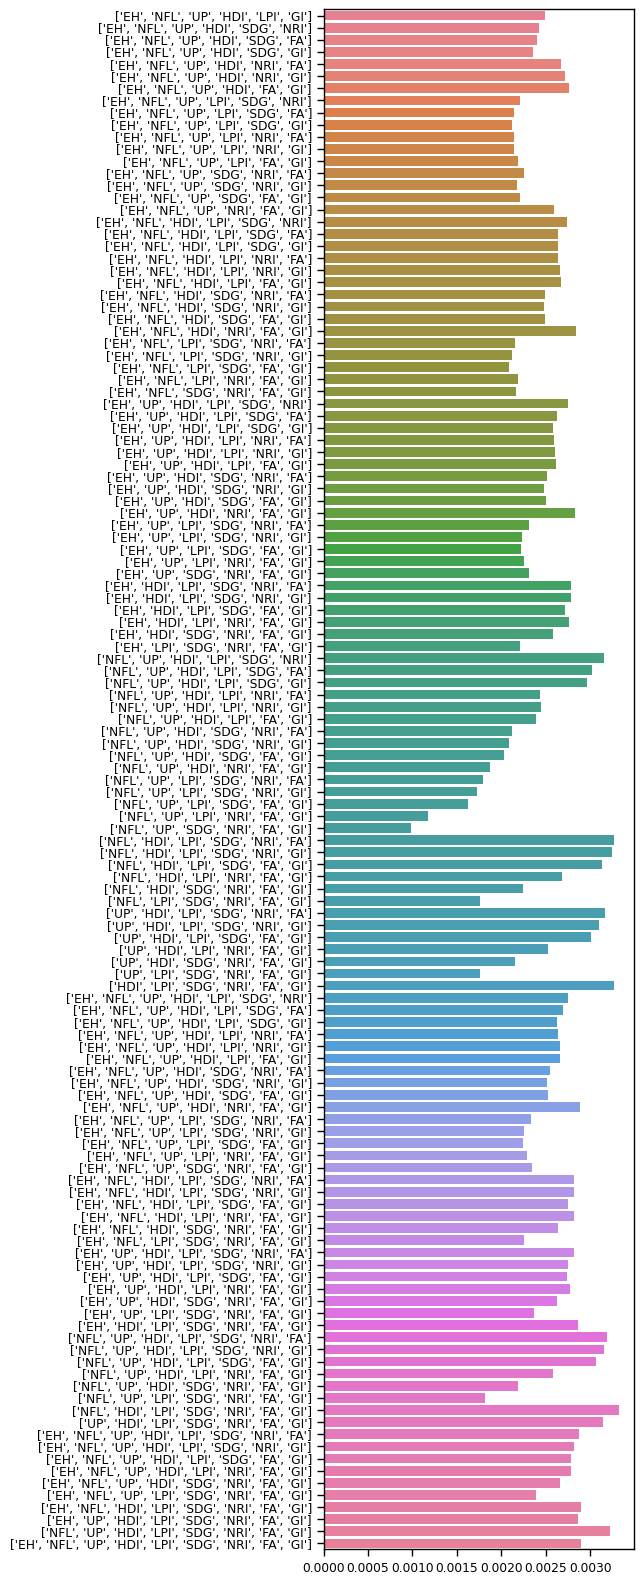

In [111]:
#fig = plt.figure(figsize=(4, 75))
fig = plt.figure(figsize=(4, 20))
#ax = sns.barplot(human_readable_df, orient='h')
ax = sns.barplot(optimal_feature_importances_df.iloc[384:].T, orient='h')
#plt.xlabel('features', fontsize=20)
#ax.axes.xaxis.set_tick_params(rotation=90)

In [112]:
fig.savefig(
    f"nature_feature_ho_importances_4.pdf",
    bbox_inches="tight",
)

In [6]:
output_path = f"{config.OUTPUT_FOLDER_BASE}observables/"
df_cluster_median = pd.read_excel(
                f"{output_path}{config.DATASET_NAME}-observable-patterns-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx",
                index_col=0
            )

In [7]:
observable_feature_names = config.OBSERVABLE_FEATURE_NAMES
selected_features = list(observable_feature_names.keys())
selected_feature_names = list(observable_feature_names.values())

In [81]:
selected_feature_names = [
    ' pollution',
    'climate change',
    'invasive ',
    'landuse',
    'exploitation'
]

In [102]:
fig = ResultVisualizer.plot_simple_radar_chart(
    observable_patterns= np.array([
        df_cluster_median.loc[row, :].to_list()
        for row in sorted(df_cluster_median.index)
    ]),
    observable_labels=selected_feature_names,
    use_config=True,
    observable_pattern_name=config.OBSERVABLE_PATTERN_NAME,
    observable_pattern_name_plural=config.OBSERVABLE_PATTERN_NAME_PLURAL, 
    max_fingerprints_per_col=3,
    spacing={
        'horizontal_spacing': 0.2,
        'vertical_spacing': 0.00,
        'height': 325,
        'width': 1000,
        'row_heights': None
    }
)

In [101]:
fig

In [5]:
exp_file: str = (
                f"{config.OUTPUT_FOLDER_BASE}explaining_features/{config.DATASET_NAME}-pairwise_explainable_distances-{config.DISTANCE_MEASURE_FINGERPRINT}-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx"
            )
df_explainable_distances = pd.read_excel(exp_file, index_col=0)

In [6]:
dendrogram = ClusteringApplier._plot_dendrogram_by_distance_matrix(
    mat=df_explainable_distances.to_numpy(),
    labels=list(df_explainable_distances.index),
    use_config=True,
    x_label=config.GROUP_NAME,
    y_label="Distance based on explanatory features",
    title="Similarity based on the optimal set of explanatory features",
)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from itertools import combinations
from numpy.random import permutation
from collections import defaultdict

In [9]:
output_path = f"{config.OUTPUT_FOLDER_BASE}observables/"

In [10]:
df_explainable: pd.DataFrame = ClusteringApplier.read_explaining_features()
df_observable_distances = pd.read_excel(
    f"{output_path}{config.DATASET_NAME}-distance-normalized-matrix-{config.DISTANCE_MEASURE_FINGERPRINT}-{config.NUMBER_OBSERVABLE_PATTERNS}.xlsx",
    index_col=0
)

In [11]:
def bar(feature_set,
        df_explainable:pd.DataFrame,
        df_observable_distances:pd.DataFrame,
        K:int=100,):
    # Def. 4: Higher-order permutation-based feature importance
    my_feature_set = np.array(feature_set)

    X = df_explainable.copy().loc[:, my_feature_set].to_numpy()
    y = df_observable_distances.copy().to_numpy()

    feature_combinations = []
    ([[feature_combinations.append(np.array(c)) for c in combinations(np.arange(len(my_feature_set)), i)] for i in range(1, len(my_feature_set)+1)])

    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    R2 = explained_variance_score(y_true=y, y_pred=y_pred)
    feature_importances = defaultdict(lambda: 0.)

    i = 0
    for cols in feature_combinations:
        for k in range(K):
            permuted_X = X.copy()
            for col_i in cols:
                permuted_X[:, col_i] = permutation(permuted_X[:, col_i])
            y_pred = model.predict(permuted_X)
            feature_importances[i] += explained_variance_score(y_true=y, y_pred=y_pred)
        i += 1

    i = 0
    for cols in feature_combinations:
        feature_importances[i] = max(0, R2 - (feature_importances[i]/K))
        i += 1
        
    adj_sum = sum(feature_importances.values())
    for key, val in feature_importances.items():
        feature_importances[key] = val / adj_sum

    assert np.isclose(sum(feature_importances.values()), 1)

    def human_readable(_dict: dict) -> dict:
        return {str([str(a) for a in my_feature_set[feature_combinations[k]]]):[v] for k, v in _dict.items()}

    revised_feature_importances = defaultdict(lambda: 0)
    i = 0
    for cols in feature_combinations:
            
        a = feature_importances[i]
        b = sum([feature_importances[j] for j in cols])
        revised_feature_importances[i] += a-b #(a/b)-1

        i += 1

    human_readable_dict = human_readable(feature_importances)
    output_df = pd.DataFrame(human_readable_dict).T.rename(columns={0:'Importance Score'})
    revised_df = pd.DataFrame(human_readable(revised_feature_importances)).T.rename(columns={0:'Revised Importance Score'})

    return output_df, revised_df

In [12]:
feature_set = list(config.EXPLAINING_FEATURE_NAMES.keys())

In [13]:
df_explainable

,NOIS,APMP,FosCO2,BHI,AQ,EH,NFL,UP,HDI,LPI,EPI,SDG,NRI,FA,AL,GI
Country,,,,,,,,,,,,,,,,
Australia,0.615592,0.080874,0.029783,0.718224,0.949551,0.926907,0.035274,0.859890,0.987066,0.892170,0.773165,0.888194,0.550931,0.252849,0.578930,0.908931
Brazil,0.261017,0.144720,0.039525,0.689353,0.465760,0.494271,0.444484,0.870200,0.801004,0.674419,0.561110,0.853514,0.323862,0.863522,0.349792,0.724500
Canada,0.372757,0.085757,0.045243,1.000116,0.915981,0.922184,0.386446,0.820280,0.973061,1.000789,0.643589,0.913891,0.121191,0.562918,0.081329,0.942084
China,0.417919,0.578655,0.999898,0.554800,0.214313,0.350710,0.064789,0.630517,0.797678,0.703261,0.366561,0.848572,0.077587,0.339393,0.694417,0.721137
Colombia,0.153829,0.265296,0.007419,0.710190,0.457935,0.540125,0.039658,0.818797,0.801742,0.657428,0.546438,0.823253,0.234744,0.775678,0.552546,0.715263
Costa Rica,0.145892,0.203343,0.001700,0.524266,0.534861,0.595144,0.002275,0.809567,0.848003,0.777338,0.595831,0.865604,0.047867,0.865039,0.427238,0.804093
Dominican Republic,0.106295,0.218168,0.000713,0.489817,0.349382,0.355612,0.001957,0.831369,0.789798,0.664257,0.543833,0.829194,0.131125,0.646936,0.622767,0.727687
Ecuador,0.188329,0.242078,0.002463,0.632327,0.459171,0.503702,0.002633,0.639053,0.796422,0.643624,0.596555,0.841099,0.076783,0.732248,0.270941,0.661597
France,0.394620,0.133695,0.025410,0.465036,0.854304,0.901780,-0.001241,0.811220,0.942228,0.863809,0.804446,0.951685,0.000305,0.458297,0.647450,0.981580


In [14]:
df_observable_distances

,Australia,Brazil,Canada,China,Colombia,Costa Rica,Dominican Republic,Ecuador,France,Germany,...,Singapore,Slovakia,South Africa,South Korea,Spain,Sweden,Thailand,United Arab Emirates,United Kingdom,United States of America
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000,0.000872,0.000597,0.000721,0.000714,0.000804,0.000906,0.001023,0.000667,0.000738,...,0.001028,0.000830,0.000452,0.000767,0.000587,0.000700,0.000789,0.000664,0.000934,0.000651
Brazil,0.000872,0.000000,0.000942,0.001106,0.000612,0.000476,0.000681,0.000231,0.000855,0.001219,...,0.001210,0.001189,0.000750,0.001088,0.000744,0.000837,0.001104,0.000814,0.001187,0.001063
Canada,0.000597,0.000942,0.000000,0.000452,0.000549,0.000743,0.000860,0.001048,0.000375,0.000577,...,0.000523,0.000393,0.000576,0.000511,0.000399,0.000598,0.000751,0.000520,0.000518,0.000537
China,0.000721,0.001106,0.000452,0.000000,0.000763,0.001000,0.000764,0.001192,0.000559,0.000432,...,0.000746,0.000502,0.000600,0.000486,0.000579,0.000702,0.000471,0.000650,0.000674,0.000394
Colombia,0.000714,0.000612,0.000549,0.000763,0.000000,0.000524,0.000653,0.000690,0.000501,0.000806,...,0.000765,0.000807,0.000457,0.000845,0.000361,0.000759,0.000809,0.000600,0.000873,0.000692
Costa Rica,0.000804,0.000476,0.000743,0.001000,0.000524,0.000000,0.000812,0.000516,0.000666,0.001040,...,0.000908,0.000932,0.000754,0.000923,0.000622,0.000704,0.001054,0.000593,0.000885,0.000926
Dominican Republic,0.000906,0.000681,0.000860,0.000764,0.000653,0.000812,0.000000,0.000690,0.000745,0.000940,...,0.001088,0.001006,0.000610,0.000878,0.000655,0.000779,0.000691,0.000720,0.001044,0.000757
Ecuador,0.001023,0.000231,0.001048,0.001192,0.000690,0.000516,0.000690,0.000000,0.000937,0.001300,...,0.001255,0.001276,0.000859,0.001161,0.000834,0.000948,0.001176,0.000909,0.001251,0.001147
France,0.000667,0.000855,0.000375,0.000559,0.000501,0.000666,0.000745,0.000937,0.000000,0.000596,...,0.000605,0.000584,0.000554,0.000502,0.000207,0.000610,0.000739,0.000561,0.000544,0.000435


In [15]:
# Ensure that both datasets contain the same indices
valid_indices = np.intersect1d(df_explainable.index, df_observable_distances.index)
valid_indices.sort()
df_explainable = df_explainable.loc[valid_indices]
df_observable_distances = df_observable_distances.loc[valid_indices]

In [18]:
feature_set[:3]

['NOIS', 'APMP', 'FosCO2']

In [19]:
res = ClusteringApplier._higher_order_feature_importance(
    feature_set = feature_set[:3],
    df_explainable = df_explainable,
    df_observable_distances = df_observable_distances,
    use_config=False,
    K = 100
)


<Axes: >

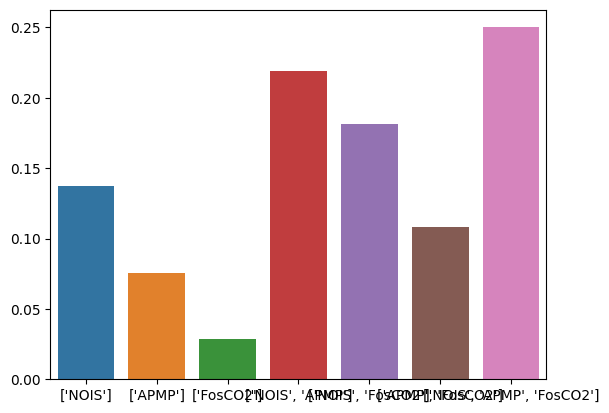

In [20]:
sns.barplot(res.T)

In [21]:
output_df, revised_df = bar(feature_set, df_explainable, df_observable_distances)

In [24]:
res.T

,['NOIS'],['APMP'],['FosCO2'],"['NOIS', 'APMP']","['NOIS', 'FosCO2']","['APMP', 'FosCO2']","['NOIS', 'APMP', 'FosCO2']"
Importance Score,0.137663,0.07535,0.028457,0.219142,0.181149,0.10814,0.2501


In [25]:
output_df.T

,['NOIS'],['APMP'],['FosCO2'],['BHI'],['AQ'],['EH'],['NFL'],['UP'],['HDI'],['LPI'],...,"['NOIS', 'APMP', 'FosCO2', 'BHI', 'AQ', 'EH', 'NFL', 'UP', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'BHI', 'AQ', 'EH', 'NFL', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'BHI', 'AQ', 'EH', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'BHI', 'AQ', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'BHI', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'AQ', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'BHI', 'AQ', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'FosCO2', 'BHI', 'AQ', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['APMP', 'FosCO2', 'BHI', 'AQ', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']","['NOIS', 'APMP', 'FosCO2', 'BHI', 'AQ', 'EH', 'NFL', 'UP', 'HDI', 'LPI', 'EPI', 'SDG', 'NRI', 'FA', 'AL', 'GI']"
Importance Score,6.376485e-07,0.000002,2.015510e-07,1.678952e-07,0.000009,0.000019,3.444372e-07,3.127519e-07,0.000001,5.900854e-07,...,0.000021,0.000022,0.000021,0.000021,0.000021,0.000021,0.000022,0.000021,0.000021,0.000022


In [26]:
revised_df.to_csv('nature_higher_order_importances_minus_sum_of_importances.csv')

In [27]:
revised_df.max()

Revised Importance Score    0.000005
dtype: float64